## Clusterização com o algoritmo Mean Shift



In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
mall0 = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv")
mall0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall0.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


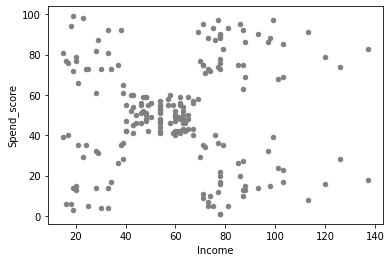

In [5]:
mall0.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [7]:
bandwidth = 0.9

In [14]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform\
                             (mall_scaled[cols_to_scale])

In [16]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])

mall_scaled['Cluster']= ms.predict(X)

In [20]:
markers = ['x', '*', '.', '|', '_', '1', '2']
color = ['blue', 'red', 'yellow', 'pink', 'purple', 'gray', 'magenta']

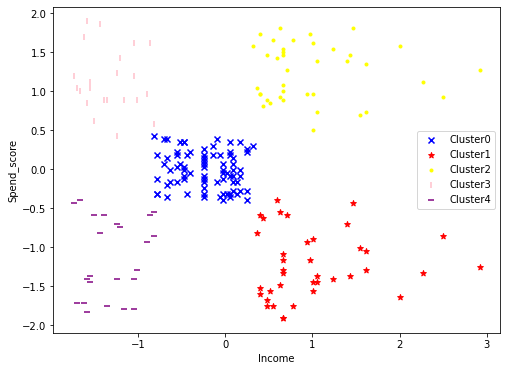

In [21]:
plt.figure(figsize=[8,6])

for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

### É possível estimar o hiperparâmetro bandwidth com a função ```estimate_bandwidth``` do scikit learn. 
#### Esta função, por sua vez, depende de outro hiperparâmetro: `quantile`.
##### `quantile` representa a porcentagem de samples do batch que será usado para estimar o `bandwidth`
#### Contudo, a escolha de um quantile também é arbitrária. Deixando este algoritmo com uma limitação semelhante ao KMeans.

In [22]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], \
                               quantile=0.1)
print(bandwidth)

0.6487582521320147


In [23]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

In [24]:
mall_scaled.Cluster.nunique()

7

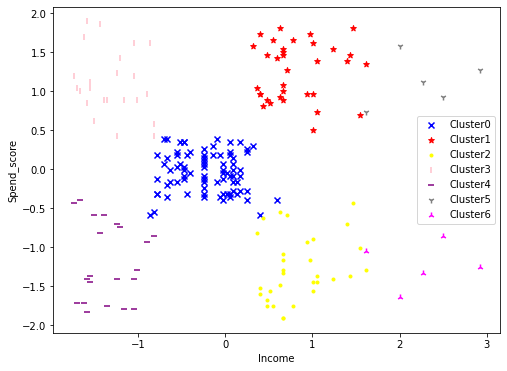

In [25]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

In [29]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], \
                               quantile=0.15)
print(bandwidth)

0.8582301835333547


In [30]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

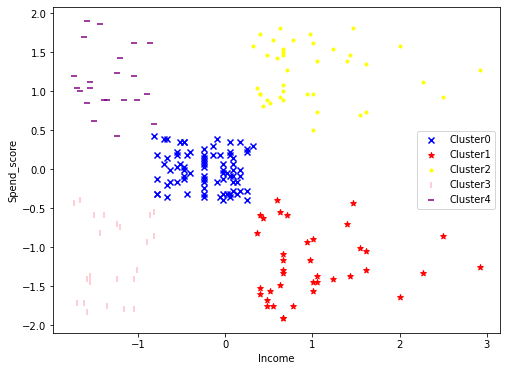

In [32]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

## Exercise 4.05: Clustering Data Using the k-prototypes Method

In [ ]:
import pandas as pd
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

Applying k-prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
cluster_cols = ['Income', 'Education']

In [ ]:
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict\
                         (bank_scaled[cluster_cols],\
                          categorical=[1])

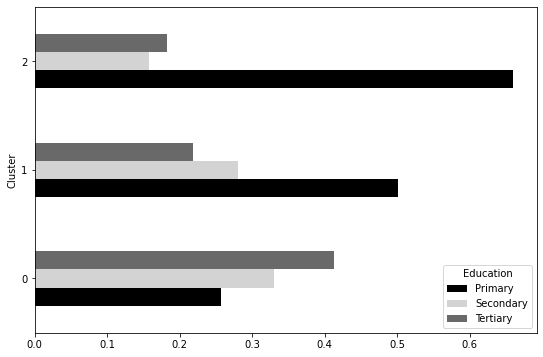

In [ ]:
res = bank_scaled.groupby('Cluster')['Education']\
                 .value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6], \
                        color=['black','lightgray','dimgray'])
plt.show()

## Exercise 4.06: Using Silhouette Score to Pick Optimal Number of Clusters

In [ ]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [ ]:
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

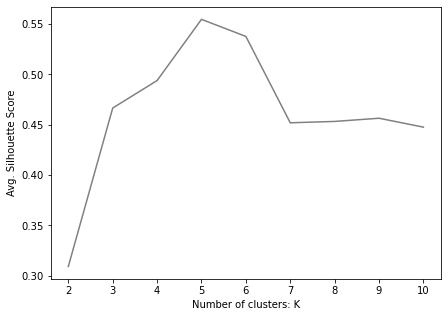

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

## Exercise 4.07: Using a Train-Test Split to Evaluate Clustering Performance

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split\
                    (mall0, train_size=0.75, \
                     random_state=42)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [ ]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score\
                 (df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5441637224196109


<ipython-input-50-41dadeea6997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])


In [ ]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score\
                 (df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49569011684195546


<ipython-input-51-0413eac449ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cluster'] = model.predict(df_test[cluster_cols])


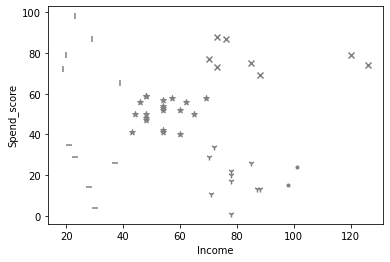

In [ ]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()